# VapoRock Lunar Basalt Test
* A thermodynamic model for vaporized silicate rocks & melts relevant to magma ocean atmospheres and stellar nebula

In [1]:
import vaporock

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
from thermoengine import model

In [2]:
from thermoengine import chem

/Users/aswolf/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:

# melt_comp_wts = pd.Series(index=chem.OXIDE_ORDER,data=np.zeros(chem.OXIDE_ORDER.size))

# Based on Lunar Basalt Sample 12022 (from Apollo 12)
# measurements reported in Smales1971 (note multiple measurement methods are simply averaged)
# melt_comp_wts.update
melt_comp_wts = {'SiO2':42.3, 'Al2O3':8.35, 'FeO':21.65, 'MgO':11.9, 'CaO':9.1,
                 'Na2O':0.23, 'K2O':0.061, 'TiO2':4.85, 'MnO':0.31, 'Cr2O3':0}







In [4]:
melt_comp_wts

{'SiO2': 42.3,
 'Al2O3': 8.35,
 'FeO': 21.65,
 'MgO': 11.9,
 'CaO': 9.1,
 'Na2O': 0.23,
 'K2O': 0.061,
 'TiO2': 4.85,
 'MnO': 0.31,
 'Cr2O3': 0}

# NOTE need to adjust redox state to match measured values in DeMaria1971 (FMQ+0.5 at 1450 K)

In [5]:
system = vaporock.System(liq_mod='v1.0')
system.set_melt_comp(melt_comp_wts)
system.print_melt_comp()


MELTS liquid components:


[('SiO2', 0.14635748829961587),
 ('TiO2', 0.03760511753361932),
 ('Al2O3', 0.05033252917115188),
 ('Fe2O3', 0.0),
 ('MgCr2O4', 0.0),
 ('Fe2SiO4', 0.09334012145127081),
 ('MnSi0.5O2', 0.0027072720253989426),
 ('Mg2SiO4', 0.09145553063112959),
 ('NiSi0.5O2', 0.0),
 ('CoSi0.5O2', 0.0),
 ('CaSiO3', 0.10052718058786166),
 ('Na2SiO3', 0.0022989480637082083),
 ('KAlSiO4', 0.0008023717035868288),
 ('Ca3(PO4)2', 0.0),
 ('H2O', 0.0)]

In [6]:
T = np.linspace(1200,2500,101)
P = 1.0
# buffer = 'IW'
# dlogfO2 = +1.5
# dlogfO2 = 1.5
# g=36.2
# logfO2 = system.redox_buffer(T, P, buffer=buffer)+dlogfO2

/Users/aswolf/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# data = pd.read_excel('data/Schaefer2004-valid-data.xlsx', 
#                      sheet_name='gas-abundances')
# data['logfO2'] = data['fO2']
# data['fO2'] = 10**data['logfO2']
# data['K'] = 10**data['K_logP']
# data['Na'] = 10**data['Na_logP']

# data.head()

In [16]:
modelDB = system.modelDB

# system.modelDB.redox_state(T, P, oxide_comp=None, 
#                     phase_of_interest='Liq', method='Kress91'):


logfO2_FMQ = modelDB.redox_buffer(T, P, buffer='FMQ')

logfO2 = logfO2_FMQ-1

/Users/aswolf/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
logP =  system.eval_gas_abundances(T, logfO2, method='chempot')

In [18]:
logP.head()

1200.0     1213.0     1226.0     1239.0     1252.0     1265.0  \
O2     -13.339507 -13.115782 -12.896820 -12.682468 -12.472580 -12.267015   
O      -14.274252 -14.044201 -13.819019 -13.598553 -13.382653 -13.171179   
Mg(g)  -15.522440 -15.280023 -15.043092 -14.811470 -14.584990 -14.363492   
MgO(g) -20.176621 -19.859730 -19.549843 -19.246738 -18.950200 -18.660023   
Mg2(g) -33.933770 -33.456047 -32.989203 -32.532890 -32.086776 -31.650541   

           1278.0     1291.0     1304.0     1317.0  ...     2383.0     2396.0  \
O2     -12.065638 -11.868321 -11.674938 -11.485372  ...  -2.894618  -2.835417   
O      -12.963993 -12.760966 -12.561972 -12.366890  ...  -3.553291  -3.493258   
Mg(g)  -14.146821 -13.934829 -13.727374 -13.524320  ...  -4.894778  -4.842012   
MgO(g) -18.376011 -18.097974 -17.825731 -17.559108  ...  -5.961058  -5.887120   
Mg2(g) -31.223882 -30.806504 -30.398127 -29.998480  ... -13.158506 -13.057220   

           2409.0     2422.0     2435.0     2448.0     2461.0     2474.0  \
O2      -2.776809  -2.718783  -2.661330  -2.604441  -2.548107  -2.492319   
O       -3.433847  -3.375047  -3.316850  -3.259246  -3.202225  -3.145778   
Mg(g)   -4.789923  -4.738499  -4.687728  -4.637599  -4.588103  -4.539228   
MgO(g)  -5.814062  -5.741869  -5.670526  -5.600019  -5.530336  -5.461462   
Mg2(g) -12.957254 -12.858585 -12.761189 -12.665044 -12.570126 -12.476413   

           2487.0     2500.0  
O2      -2.437067  -2.382345  
O       -3.089896  -3.034569  
Mg(g)   -4.490964  -4.443301  
MgO(g)  -5.393385  -5.326091  
Mg2(g) -12.383884 -12.292516  

[5 rows x 101 columns]

In [19]:


logP_abundant = system.get_abundant_species(logP, N=12)



/Users/aswolf/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
vapor_specs = ['O2','O','Na(g)','K(g)','Fe(g)','Mg(g)','SiO(g)',
               'Mn(g)','Cr(g)','Ca(g)','Al(g)','TiO2(g)','TiO(g)']
vapor_specs = ['O2','O','Na(g)','K(g)','Fe(g)','Mg(g)','SiO(g)',
              'Ca(g)','Al(g)']

logP_meas = logP.loc[vapor_specs]

In [21]:
plt.rc('axes', prop_cycle=(cycler(linestyle=['-', '--', ':', '-.'])*
                           cycler(color=['c','m','k','y','r','g','b'])))

In [22]:
invT = 1e4/logP_meas.columns.values


(4.0, 8.0)

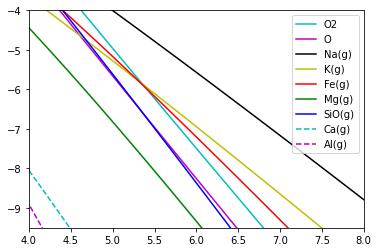

In [23]:
plt.figure()
plt.plot(invT, logP_meas.T)
plt.legend(logP_meas.index)
plt.ylim(-9.5,-4)
plt.xlim(4,8)

In [185]:
melt_comp_mol = chem.format_mol_oxide_comp(melt_comp_wts, convert_grams_to_moles=True)
melt_comp_mol

array([7.04005006e-01, 6.07017878e-02, 8.18938326e-02, 0.00000000e+00,
       0.00000000e+00, 3.01337297e-01, 4.37005021e-03, 2.95253124e-01,
       0.00000000e+00, 0.00000000e+00, 1.62269924e-01, 3.71093794e-03,
       6.47590010e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [186]:
Tref = 1450
logfO2_ref = modelDB.redox_buffer(Tref, 1, buffer='FMQ')+0.5
logfO2_ref

-8.24065735997456

In [187]:
ln_Fe_oxide_ratio = system.modelDB.redox_state(Tref, P, oxide_comp={'Liq':melt_comp_mol},logfO2 =logfO2_ref,
                    phase_of_interest='Liq', method='Kress91')[0]

In [188]:
Fe_oxide_ratio = np.exp(ln_Fe_oxide_ratio)

In [173]:
melt_comp_mol

# updated molar melt comp

array([7.04005006e-01, 6.07017878e-02, 8.18938326e-02, 2.03555974e-02,
       0.00000000e+00, 2.60626102e-01, 4.37005021e-03, 2.95253124e-01,
       0.00000000e+00, 0.00000000e+00, 1.62269924e-01, 3.71093794e-03,
       6.47590010e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [174]:
logfO2_intrinsic = system.modelDB.redox_state(T, P, oxide_comp={'Liq':melt_comp_mol},
                    phase_of_interest='Liq', method='Kress91')

In [175]:
oxide_comp = pd.Series(index=chem.OXIDE_ORDER,data=np.zeros(chem.OXIDE_ORDER.size))
oxide_comp[]

SyntaxError: invalid syntax (<ipython-input-175-7b84528a90f8>, line 2)

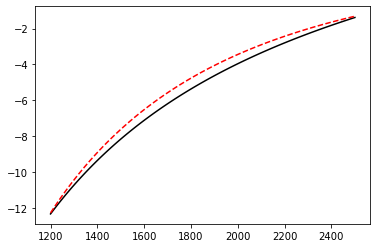

In [176]:
plt.figure()
plt.plot(T, logfO2_FMQ, 'k-')
plt.plot(T, logfO2_intrinsic, 'r--')

In [106]:
logP_meas.T.plot(x=invT)

KeyError: "None of [Float64Index([ 8.333333333333334,  8.244023083264633,  8.156606851549755,\n               8.071025020177563,  7.987220447284345,  7.905138339920948,\n                7.82472613458529,  7.745933384972889,  7.668711656441718,\n               7.593014426727411,\n              ...\n              4.1963911036508605,  4.173622704507513,     4.151100041511,\n              4.1288191577208915, 4.1067761806981515,  4.084967320261438,\n               4.063388866314506,  4.042037186742118, 4.0209087253719344,\n                             4.0],\n             dtype='float64', length=101)] are in the [columns]"